First five rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             

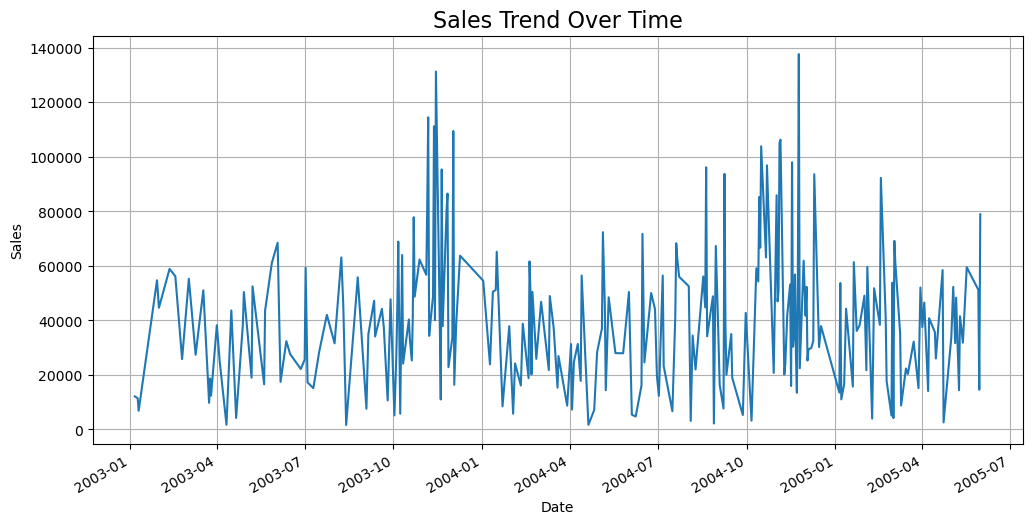

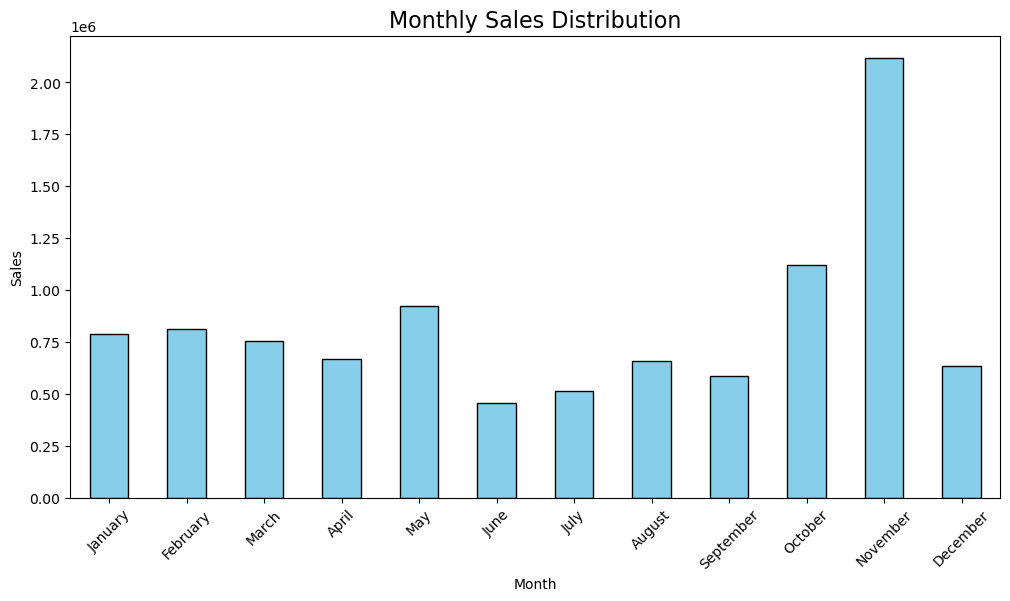

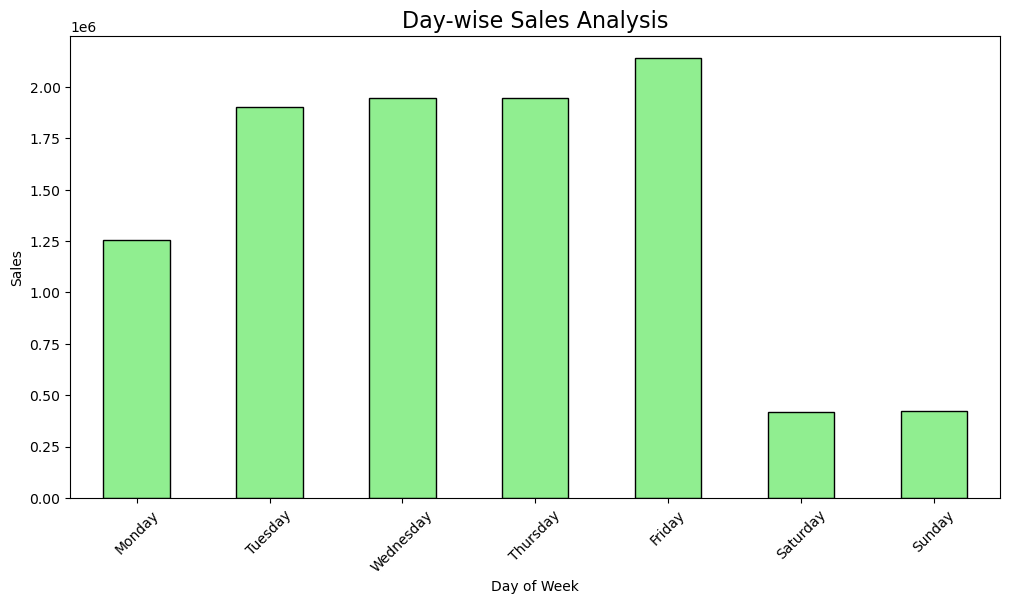

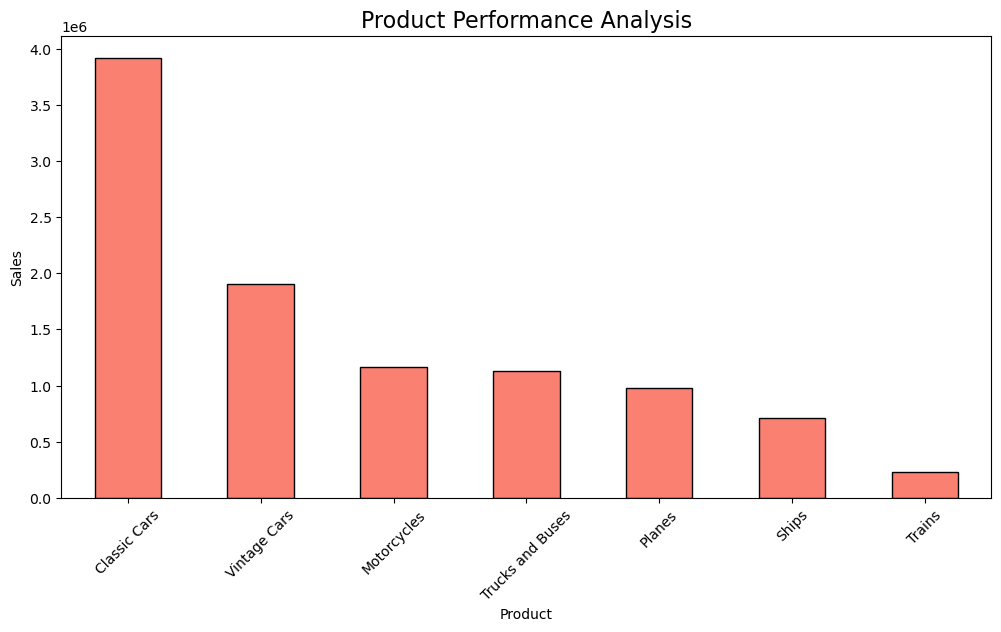


Top 10 Products by Sales:
PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

Correlation Matrix:


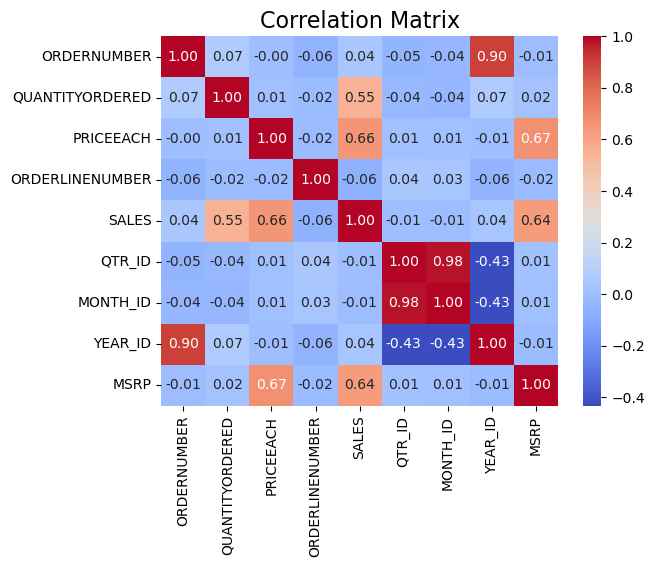

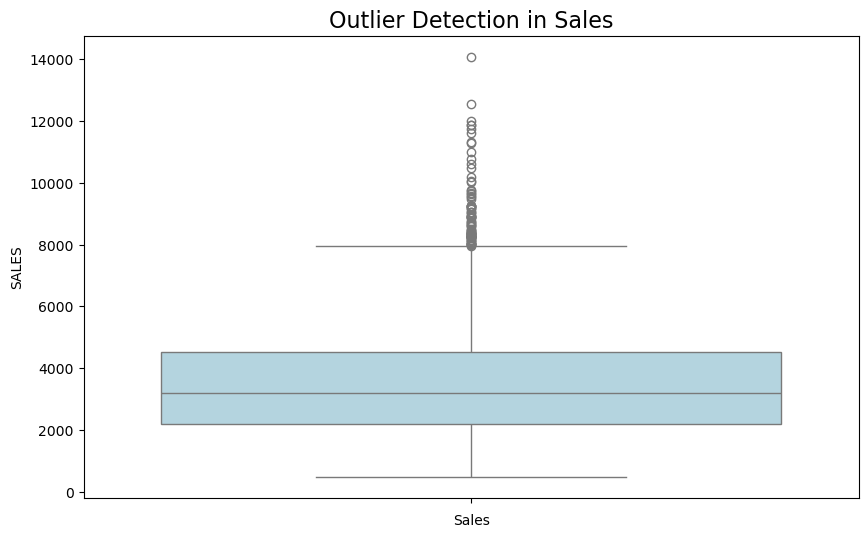

Cleaned data saved to cleaned_sales_data.csv


In [1]:
# Project : With Sales Data Analysis Perform EDA and visualization to analyze sales trends, seasonality, and product performance.

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the Dataset
data = pd.read_csv("C:/Users/User/Desktop/Python/Ivoyant Projects/Sales Data Analysis/sales_data_sample.csv", encoding='ISO-8859-1')

# Preview the Dataset
print("First five rows of the dataset:")
print(data.head())

# Check for Null Values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Data Overview
print("\nDataset Info:")
print(data.info())

# Convert 'ORDERDATE' column to datetime (let pandas infer the format)
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

# Extract Year, Month, and Weekday from ORDERDATE
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month_name()
data['Weekday'] = data['ORDERDATE'].dt.day_name()

# Data Description
print("\nStatistical Summary:")
print(data.describe())

# 1. Sales Trend Over Time
plt.figure(figsize=(12, 6))
sales_over_time = data.groupby('ORDERDATE')['SALES'].sum()
sales_over_time.plot()
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

# 2. Monthly Sales Distribution
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby('Month')['SALES'].sum()
monthly_sales = monthly_sales.reindex(
    ["January", "February", "March", "April", "May", "June",
     "July", "August", "September", "October", "November", "December"]
)
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Monthly Sales Distribution", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# 3. Day-wise Sales Analysis
plt.figure(figsize=(12, 6))
weekday_sales = data.groupby('Weekday')['SALES'].sum()
weekday_sales = weekday_sales.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
weekday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Day-wise Sales Analysis", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# 4. Product Performance Analysis
if 'PRODUCTLINE' in data.columns:
    plt.figure(figsize=(12, 6))
    product_sales = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
    product_sales.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title("Product Performance Analysis", fontsize=16)
    plt.xlabel("Product")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

# 5. Top 10 Products by Sales
if 'PRODUCTLINE' in data.columns:
    print("\nTop 10 Products by Sales:")
    top_products = data.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
    print(top_products)

# 6. Correlation Analysis (if numerical columns exist)
print("\nCorrelation Matrix:")
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# 7. Outlier Detection in Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data['SALES'], color='lightblue')
plt.title("Outlier Detection in Sales", fontsize=16)
plt.xlabel("Sales")
plt.show()

# Save Cleaned Dataset (Optional)
cleaned_data_path = "cleaned_sales_data.csv"
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

